## Housing Prediction Analysis
---

##### Problem Statement - Can we predict the final price of each home sale based on the collection of explanatory variable data and features contribute to the predicting of the final sale price?

##### Steps to review for Data Science Lifecycle Process:
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [3]:
# Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# pd options
pd.pandas.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('train.csv')

df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Data Analysis Todo List
1. Evaluate Missing Values
2. Review numerical values
3. Review Distribution of numerical variables
4. Review Categorical variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent features


In [6]:
# Missing Values Review
# create list of features with missing values
feat_with_na = [features for features in df.columns if df[features].isnull().sum() > 1]

# output percentage of missing for each feature with missing values
for feature in feat_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 4), ' % missing values')

LotFrontage 17.7397  % missing values
Alley 93.7671  % missing values
MasVnrType 0.5479  % missing values
MasVnrArea 0.5479  % missing values
BsmtQual 2.5342  % missing values
BsmtCond 2.5342  % missing values
BsmtExposure 2.6027  % missing values
BsmtFinType1 2.5342  % missing values
BsmtFinType2 2.6027  % missing values
FireplaceQu 47.2603  % missing values
GarageType 5.5479  % missing values
GarageYrBlt 5.5479  % missing values
GarageFinish 5.5479  % missing values
GarageQual 5.5479  % missing values
GarageCond 5.5479  % missing values
PoolQC 99.5205  % missing values
Fence 80.7534  % missing values
MiscFeature 96.3014  % missing values


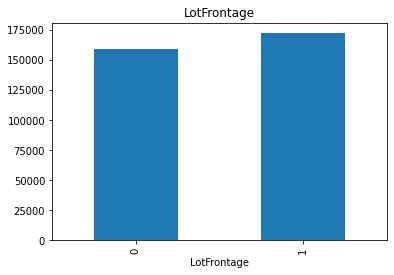

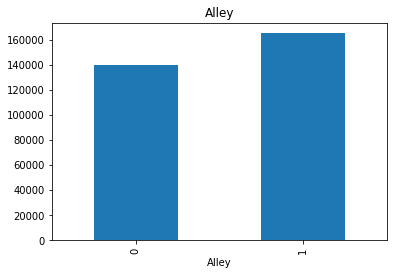

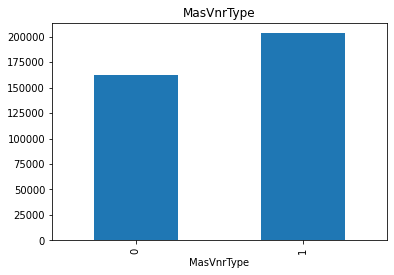

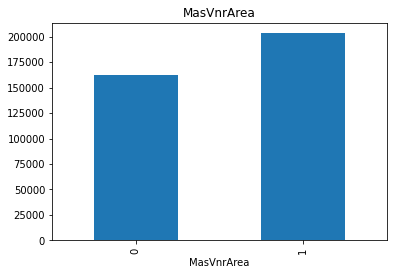

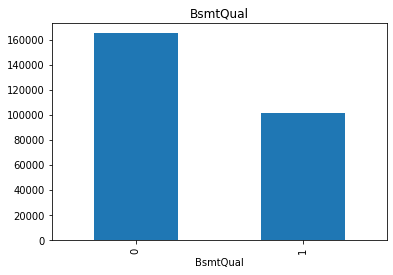

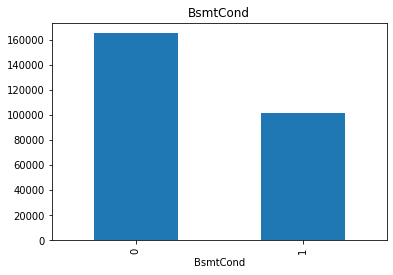

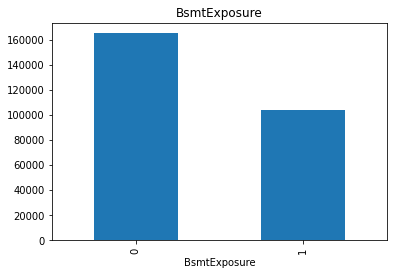

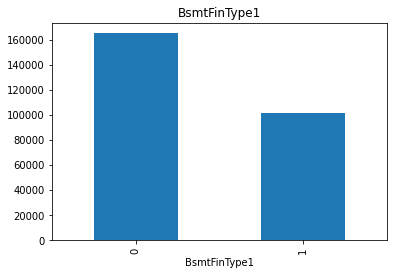

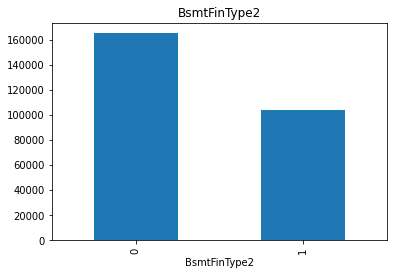

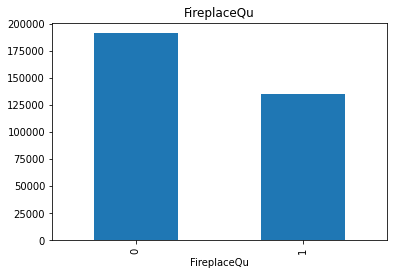

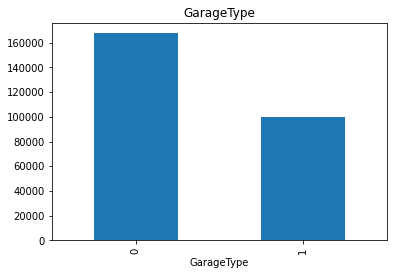

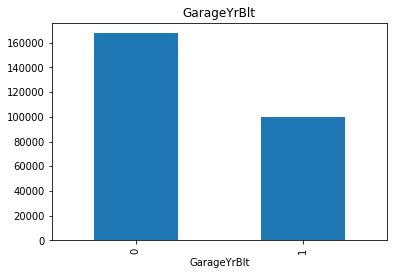

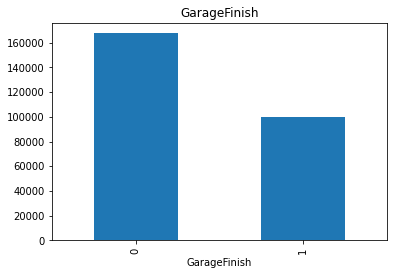

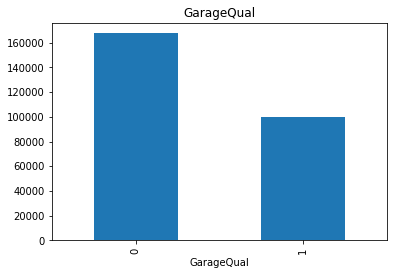

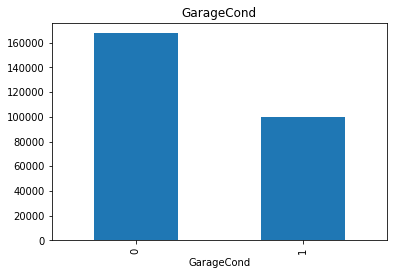

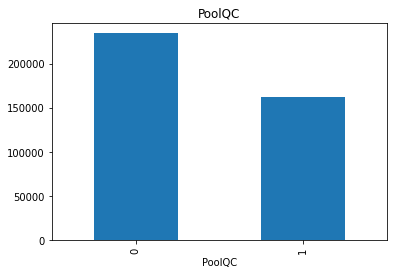

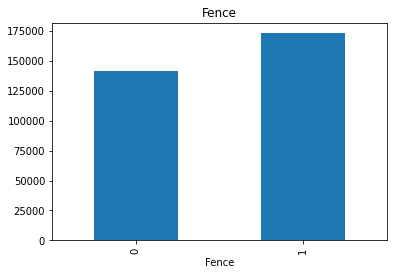

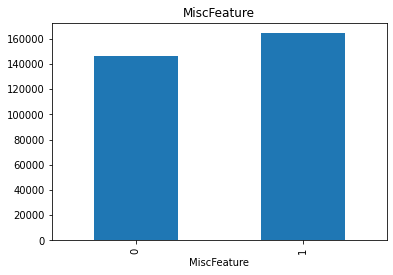

In [7]:
# Do the features with missing values have an impact on the outcome (Sales Price)?
for feature in feat_with_na:
    # creating a copy to avoid overwritting original df
    df_copy = df.copy()

    # create indicator of 1 if observation was missing for a specific feature else 0
    df_copy[feature] = np.where(df_copy[feature].isnull(), 1, 0)

    # calculate mean SalePrice for features with missing variables
    df_copy.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

#### Summary Notes
- There are several features with null values that have an impact on the sale price. Some features show a higher than median compared to non-null values and others show a lower median value. We will need to revisit these features in the feature engineering section.

In [8]:
# Review unique id counts
print(f'Total number of house id counts: {len(df_copy["Id"])}')

Total number of house id counts: 1460


Summary Notes: unique id is not needed in final datasets and can be dropped.

In [16]:
# Reviewing Numerical Variable
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtypes != 'O' ]

print(f'Total number of numerical features: {len(numerical_features)}')

# Validate features are numerical
df_copy[numerical_features].head()

Total number of numerical features: 39


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,1,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,1,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,1,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,1,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,1,0,12,2008,250000


In [18]:
# Among numerical features, reviewing the temporal variables (time/year). We will consider reviewing date difference in when house was built vs sold
# Create list of year features
time_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
time_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [21]:
# Review unique values in year features
for feature in time_features:
    print(f'{feature} unique values: {df_copy[feature].unique()}')

YearBuilt unique values: [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd unique values: [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt unique values: [2003. 1976. 2001. 1998. 2000. 1993. 200

<AxesSubplot:>

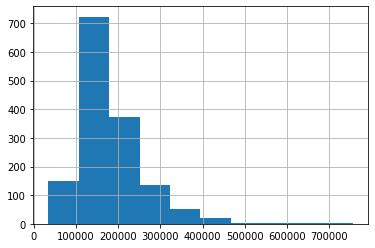

In [33]:
# Using median or mean?
df['SalePrice'].hist()

Summary notes: since data is skewed towards the left, it would make sense to use median values for sale price when reviewing the relationship between the features and outcome of sale price.

Text(0.5, 1.0, 'House Price vs Year Sold')

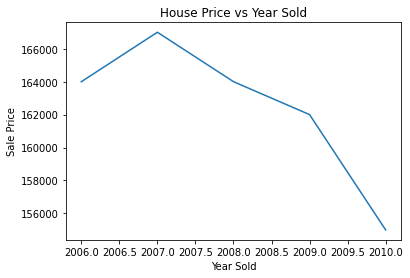

In [22]:
# Plotting year feature Year Sold values against sale price
df_copy.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.title('House Price vs Year Sold')


Summary Notes: Interesting to see the price decreasing overtime when typically you price increasing. Next step is to look further and validate other year features to see if that is truly the case.

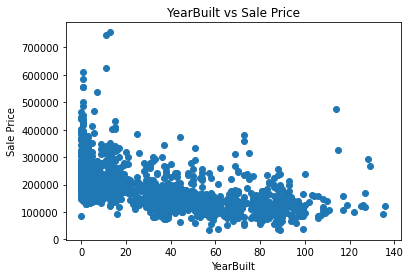

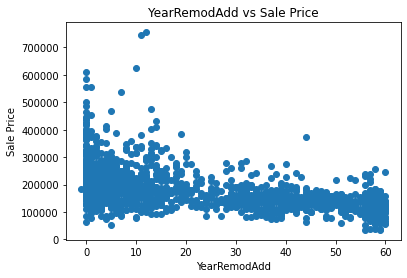

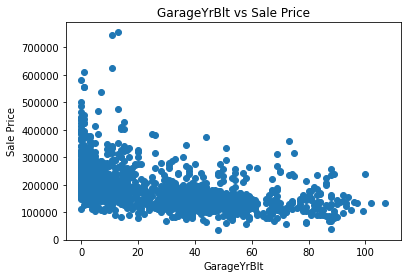

In [25]:
# Compare difference between each year feature and year sold
for feature in time_features:
    if feature !='YrSold':
        # Creating a copy to avoid modifying original data set
        data = df_copy.copy()
        # Calculate the difference between year sold and year feature
        data[feature] = data['YrSold'] - data[feature]

        plt.scatter(x = data[feature], y = data['SalePrice'])
        plt.xlabel(f'{feature}')
        plt.ylabel('Sale Price')
        plt.title(f'{feature} vs Sale Price')
        plt.show()


In [26]:
# Reviewing discrete variables
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in time_features and feature != ['Id']]

# Validating discrete features
print(f'Total number of discrete features: {len(discrete_features)}')
df[discrete_features].head()

Total number of discrete features: 18


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscFeature,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,NaN,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,NaN,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,NaN,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,NaN,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,NaN,0,12


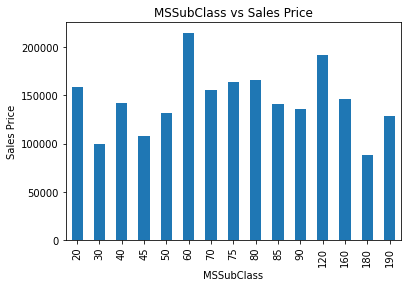

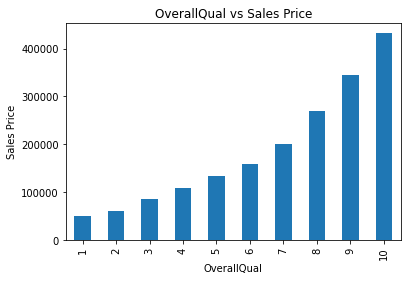

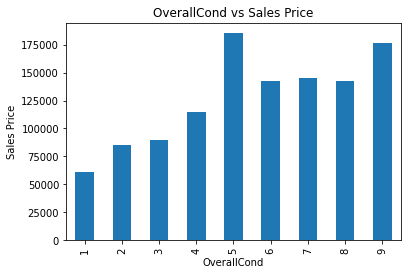

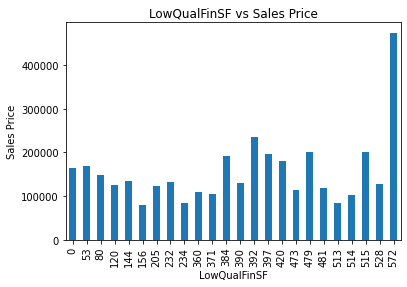

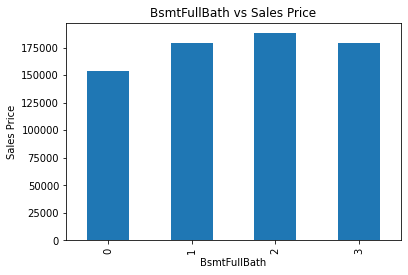

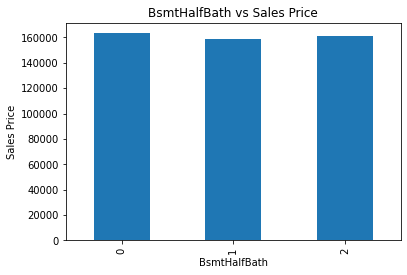

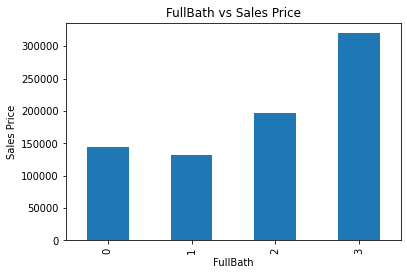

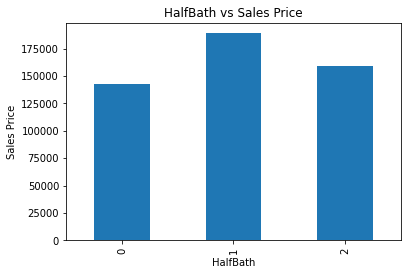

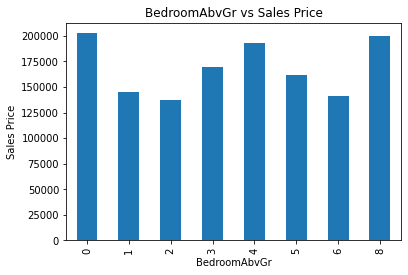

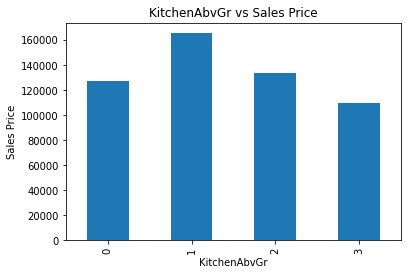

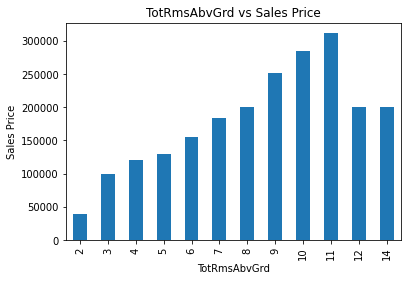

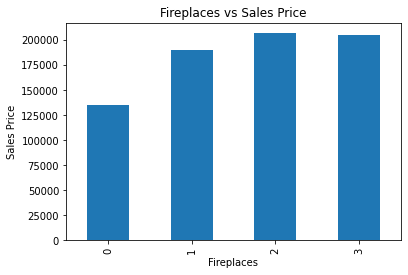

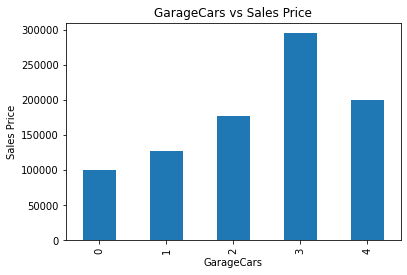

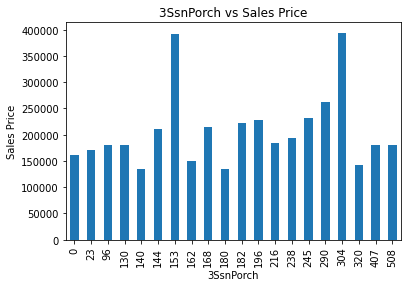

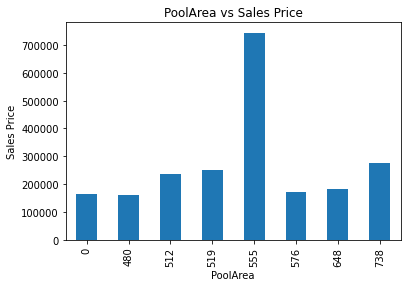

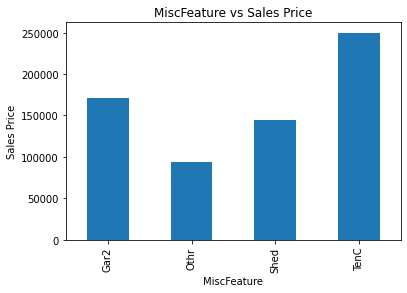

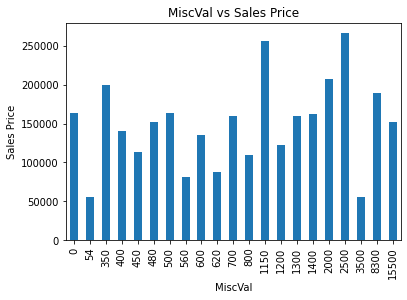

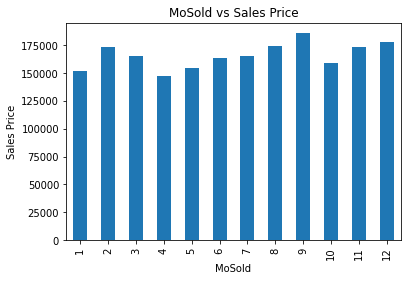

In [28]:
# Reviewing relationship between discrete features and Sales Price

for feature in discrete_features:
    # Create copy of dataset to avoid overwrite of original data
    data = df.copy()

    # Plotting relationship between feature and Sales Price in bar chart
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title(f'{feature} vs Sales Price')
    plt.show()

In [34]:
# Reviewing Continuous Variables
